# Run Differential Tracking

### MSP 8.21.2017

Set up to track run differential, over

1. The year
2. The month
3. The week

What else do we need?

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl
cmap = cm.gnuplot




In [3]:
# imports for scraping

from bs4 import BeautifulSoup

import requests

import operator



In [4]:
teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']

# can go back seasons with ?season=2016 at end of url

In [5]:
# get twins data
#teams = ['twins']

Schedule = {}


for inteam in teams:
    
    print inteam+' ',
    
    Schedule[inteam] = {}
    
    r  = requests.get('http://www.fangraphs.com/teams/'+inteam+'/schedule')

    data = r.text

    soup = BeautifulSoup(data)

    table_div = soup.find('div' , {"class":"team-schedule-table"})
    table = table_div.find('table')

    # The first tr contains the field names.
    headings = [th.get_text() for th in table.find("tr").find_all("th")]

    # get number of games played
    ngames = 0
    for row in table.find_all("tr")[1:]:
        if [td.get_text() for td in row.find_all("td")][5] != '':
            ngames += 1       
        

    headings[3] = 'HomeWin'
    headings[5] = 'HomeRuns'
    headings[7] = 'HomeStarter'

    #print headings


    for indx,val in enumerate(headings):
        Schedule[inteam][val] = np.empty(ngames,dtype='S20')

    game = 0
    for row in table.find_all("tr")[1:]:
        if [td.get_text() for td in row.find_all("td")][5] != '':
            for indx,val in enumerate(headings):
                Schedule[inteam][val][game] = [td.get_text().decode() for td in row.find_all("td")][indx]
            game += 1


angels  astros  athletics  bluejays  braves  brewers  cardinals  cubs  diamondbacks  dodgers  giants  indians  mariners  marlins  mets  nationals  orioles  padres  phillies  pirates  rangers  rays  reds  redsox  rockies  royals  tigers  twins  whitesox  yankees 


### Full Year



In [6]:

rdiff = {}
for inteam in teams:

    rdiff[inteam] = np.sum(Schedule[inteam]['HomeRuns'].astype(float) - Schedule[inteam]['OppRuns'].astype(float))

sorted_x = sorted(rdiff.items(), key=operator.itemgetter(1)) 

#print 


#for tupl in sorted_x[::-1]:
#   print '{0:<12s} {1:>6.1f}'.format(tupl[0],tupl[1])
                                 
                                 

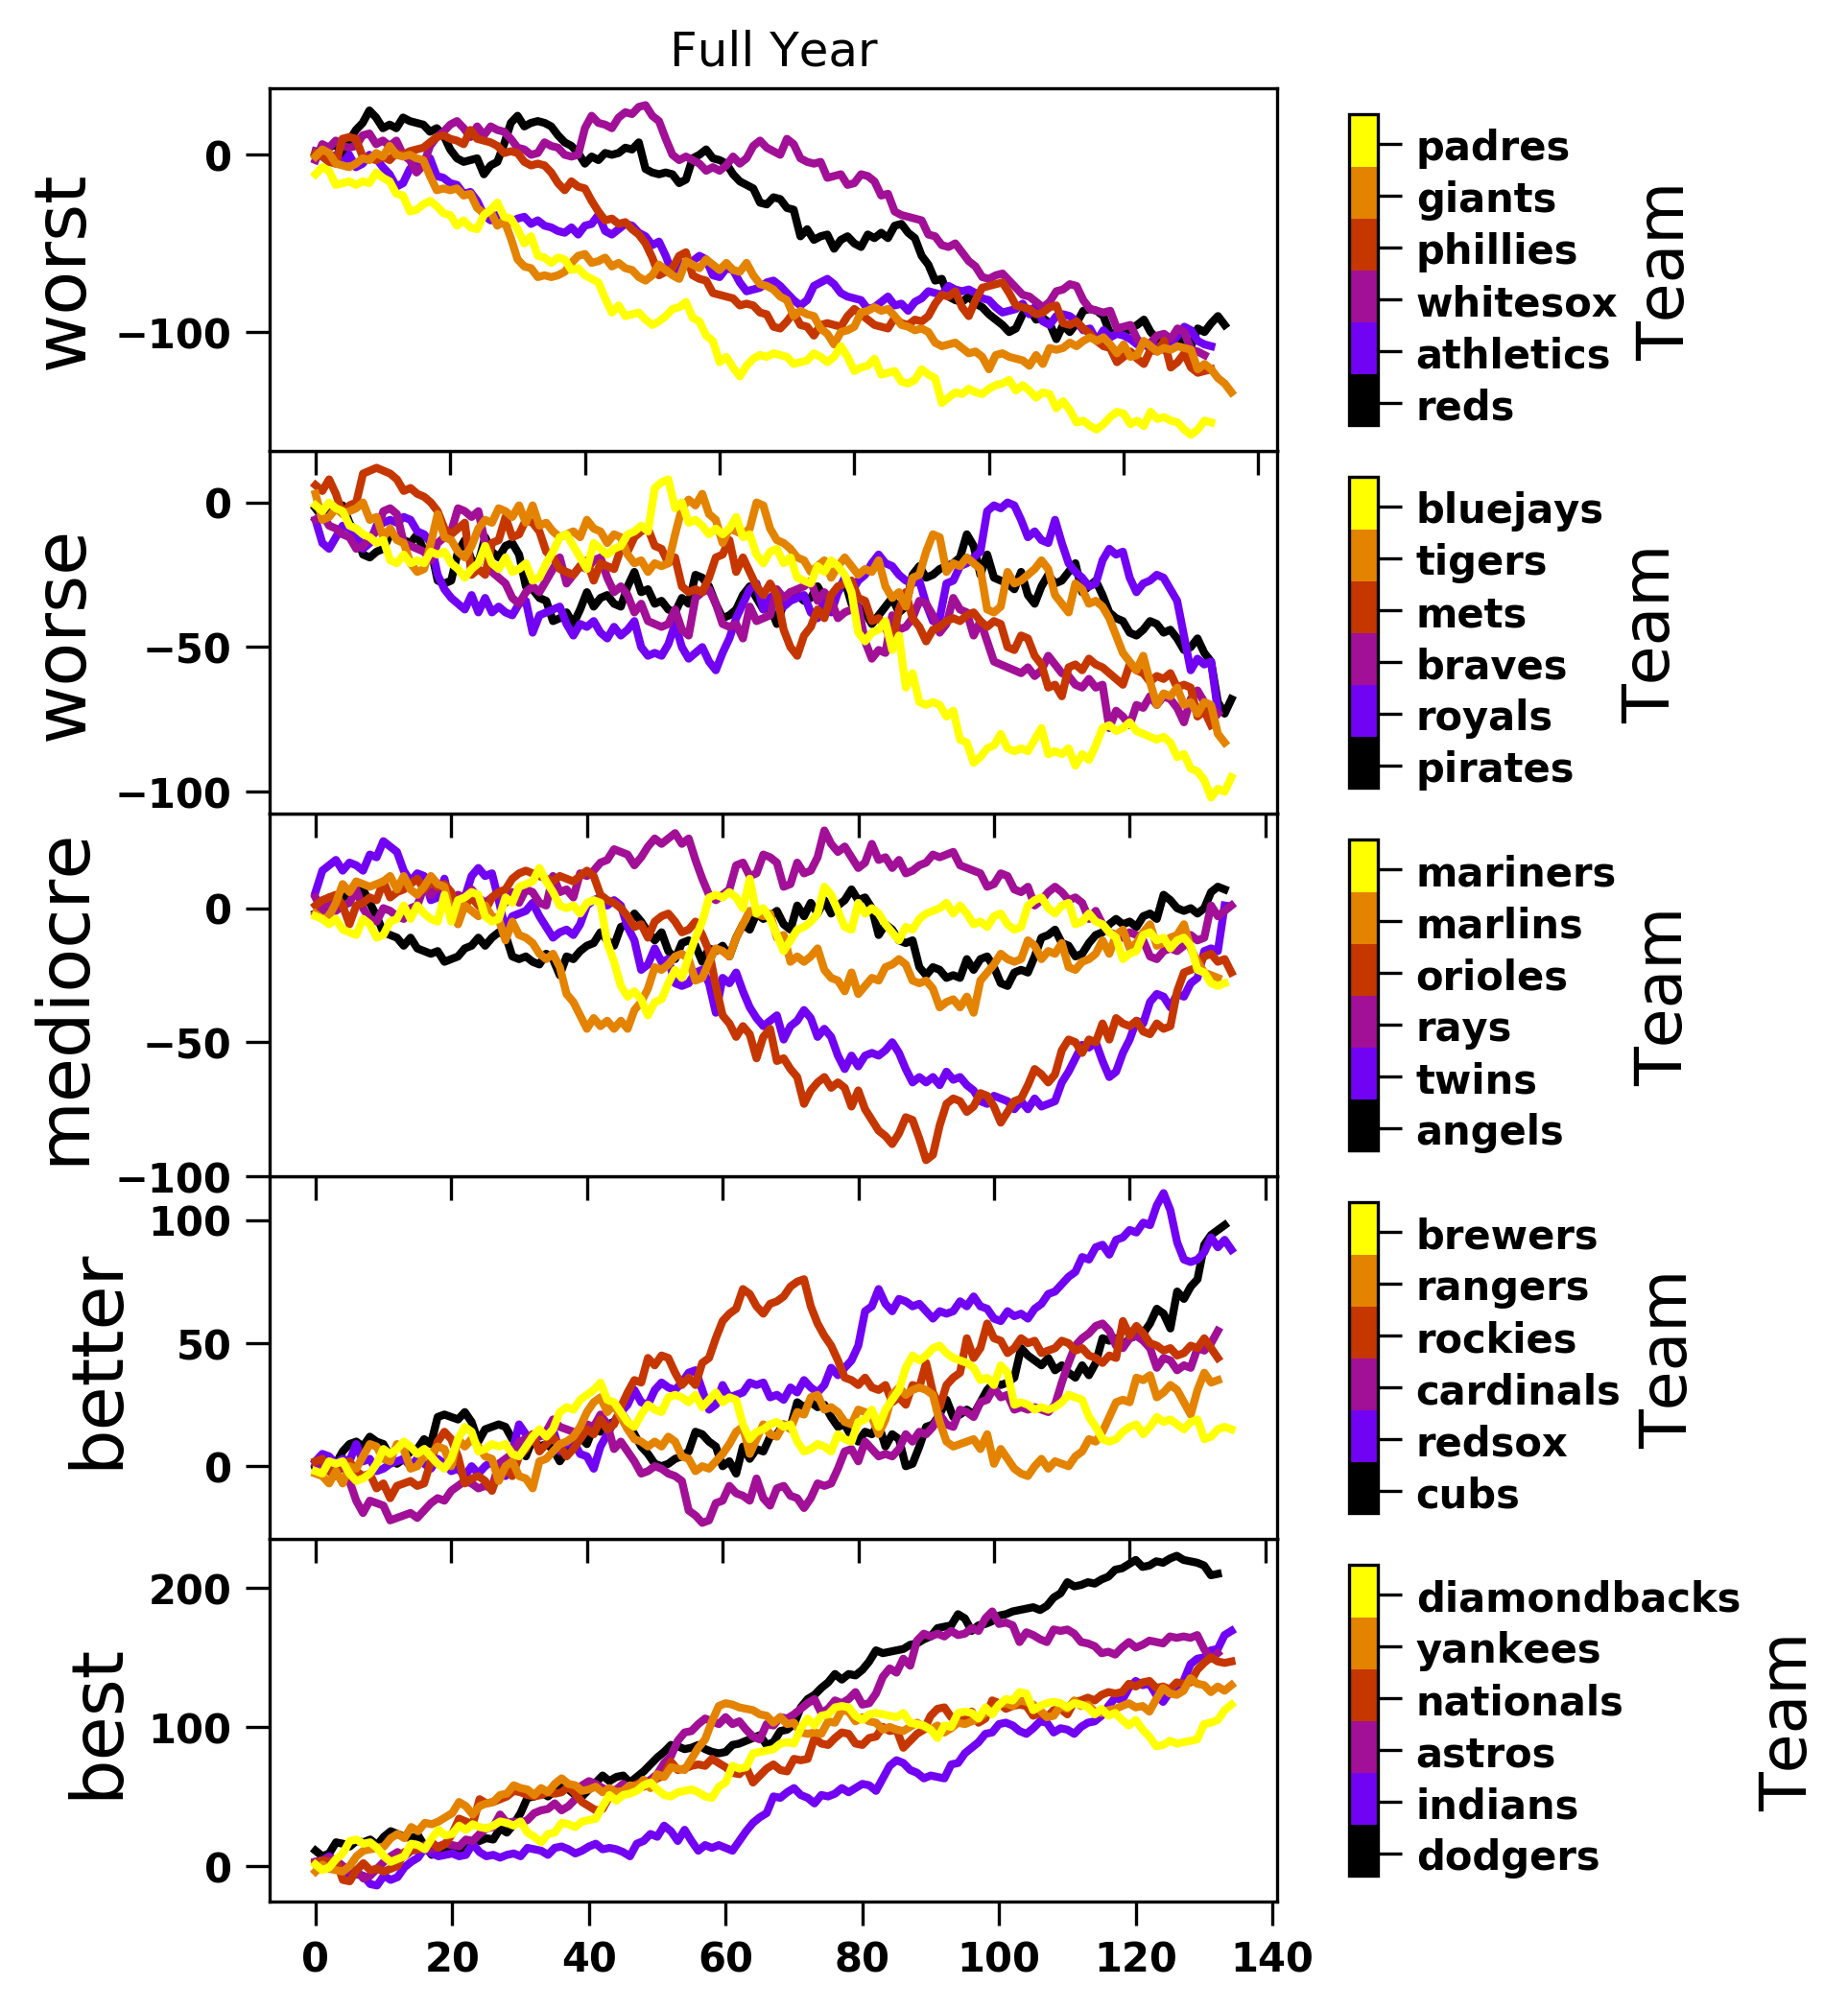

In [7]:
fig = plt.figure(figsize=(5,9))

ax1 = fig.add_axes([0.15,0.15,0.7,0.14]); ax11 = fig.add_axes([0.9,0.16,0.02,0.12])

ax2 = fig.add_axes([0.15,0.29,0.7,0.14]); ax21 = fig.add_axes([0.9,0.30,0.02,0.12])
ax3 = fig.add_axes([0.15,0.43,0.7,0.14]); ax31 = fig.add_axes([0.9,0.44,0.02,0.12])
ax4 = fig.add_axes([0.15,0.57,0.7,0.14]); ax41 = fig.add_axes([0.9,0.58,0.02,0.12])
ax5 = fig.add_axes([0.15,0.71,0.7,0.14]); ax51 = fig.add_axes([0.9,0.72,0.02,0.12])


ax_list = [ax1,ax2,ax3,ax4,ax5]
ax_list1 = [ax11,ax21,ax31,ax41,ax51]

standings = ['best','better','mediocre','worse','worst']

teamlist = []
for j in range(0,5):
    teamlist.append([sorted_x[::-1][i][0] for i in range(j*6,(j+1)*6)])


for indxteam,teams2 in enumerate(teamlist):
    for indx,inteam in enumerate(teams2):

        ax_list[indxteam].plot(np.cumsum(Schedule[inteam]['HomeRuns'].astype(float) - Schedule[inteam]['OppRuns'].astype(float)),color=cm.gnuplot(indx/float(len(teams2)-1.),1.))
    

    norm = mpl.colors.BoundaryNorm(boundaries=np.linspace(0,1.,len(teams2)+1.), ncolors=256)
    cb1 = mpl.colorbar.ColorbarBase(ax_list1[indxteam], cmap=cmap,norm=norm)
    cb1.set_label('Team',size=16)
    cb1.set_ticks(np.linspace(0.,1.,len(teams2)+1.) + 0.5/(len(teams2)+1.))
    cb1.set_ticklabels(teams2)
    
    if indxteam > 0:
        ax_list[indxteam].set_xticklabels(())

    ax_list[indxteam].set_ylabel(standings[indxteam],size=18)


    
_ = ax5.set_title('Full Year')

### Three Week Stretch

What about checking over a specific date range to see how run differential is coming along? Here, calculate over the last 20 games (roughly three weeks)

In [8]:

overgames = -20
rdiff = {}
for inteam in teams: rdiff[inteam] = np.sum(Schedule[inteam]['HomeRuns'][overgames:-1].astype(float) - Schedule[inteam]['OppRuns'][overgames:-1].astype(float))

sorted_x = sorted(rdiff.items(), key=operator.itemgetter(1)) 

#for tupl in sorted_x[::-1]: print '{0:<12s} {1:>6.1f}'.format(tupl[0],tupl[1])
                                 
                            

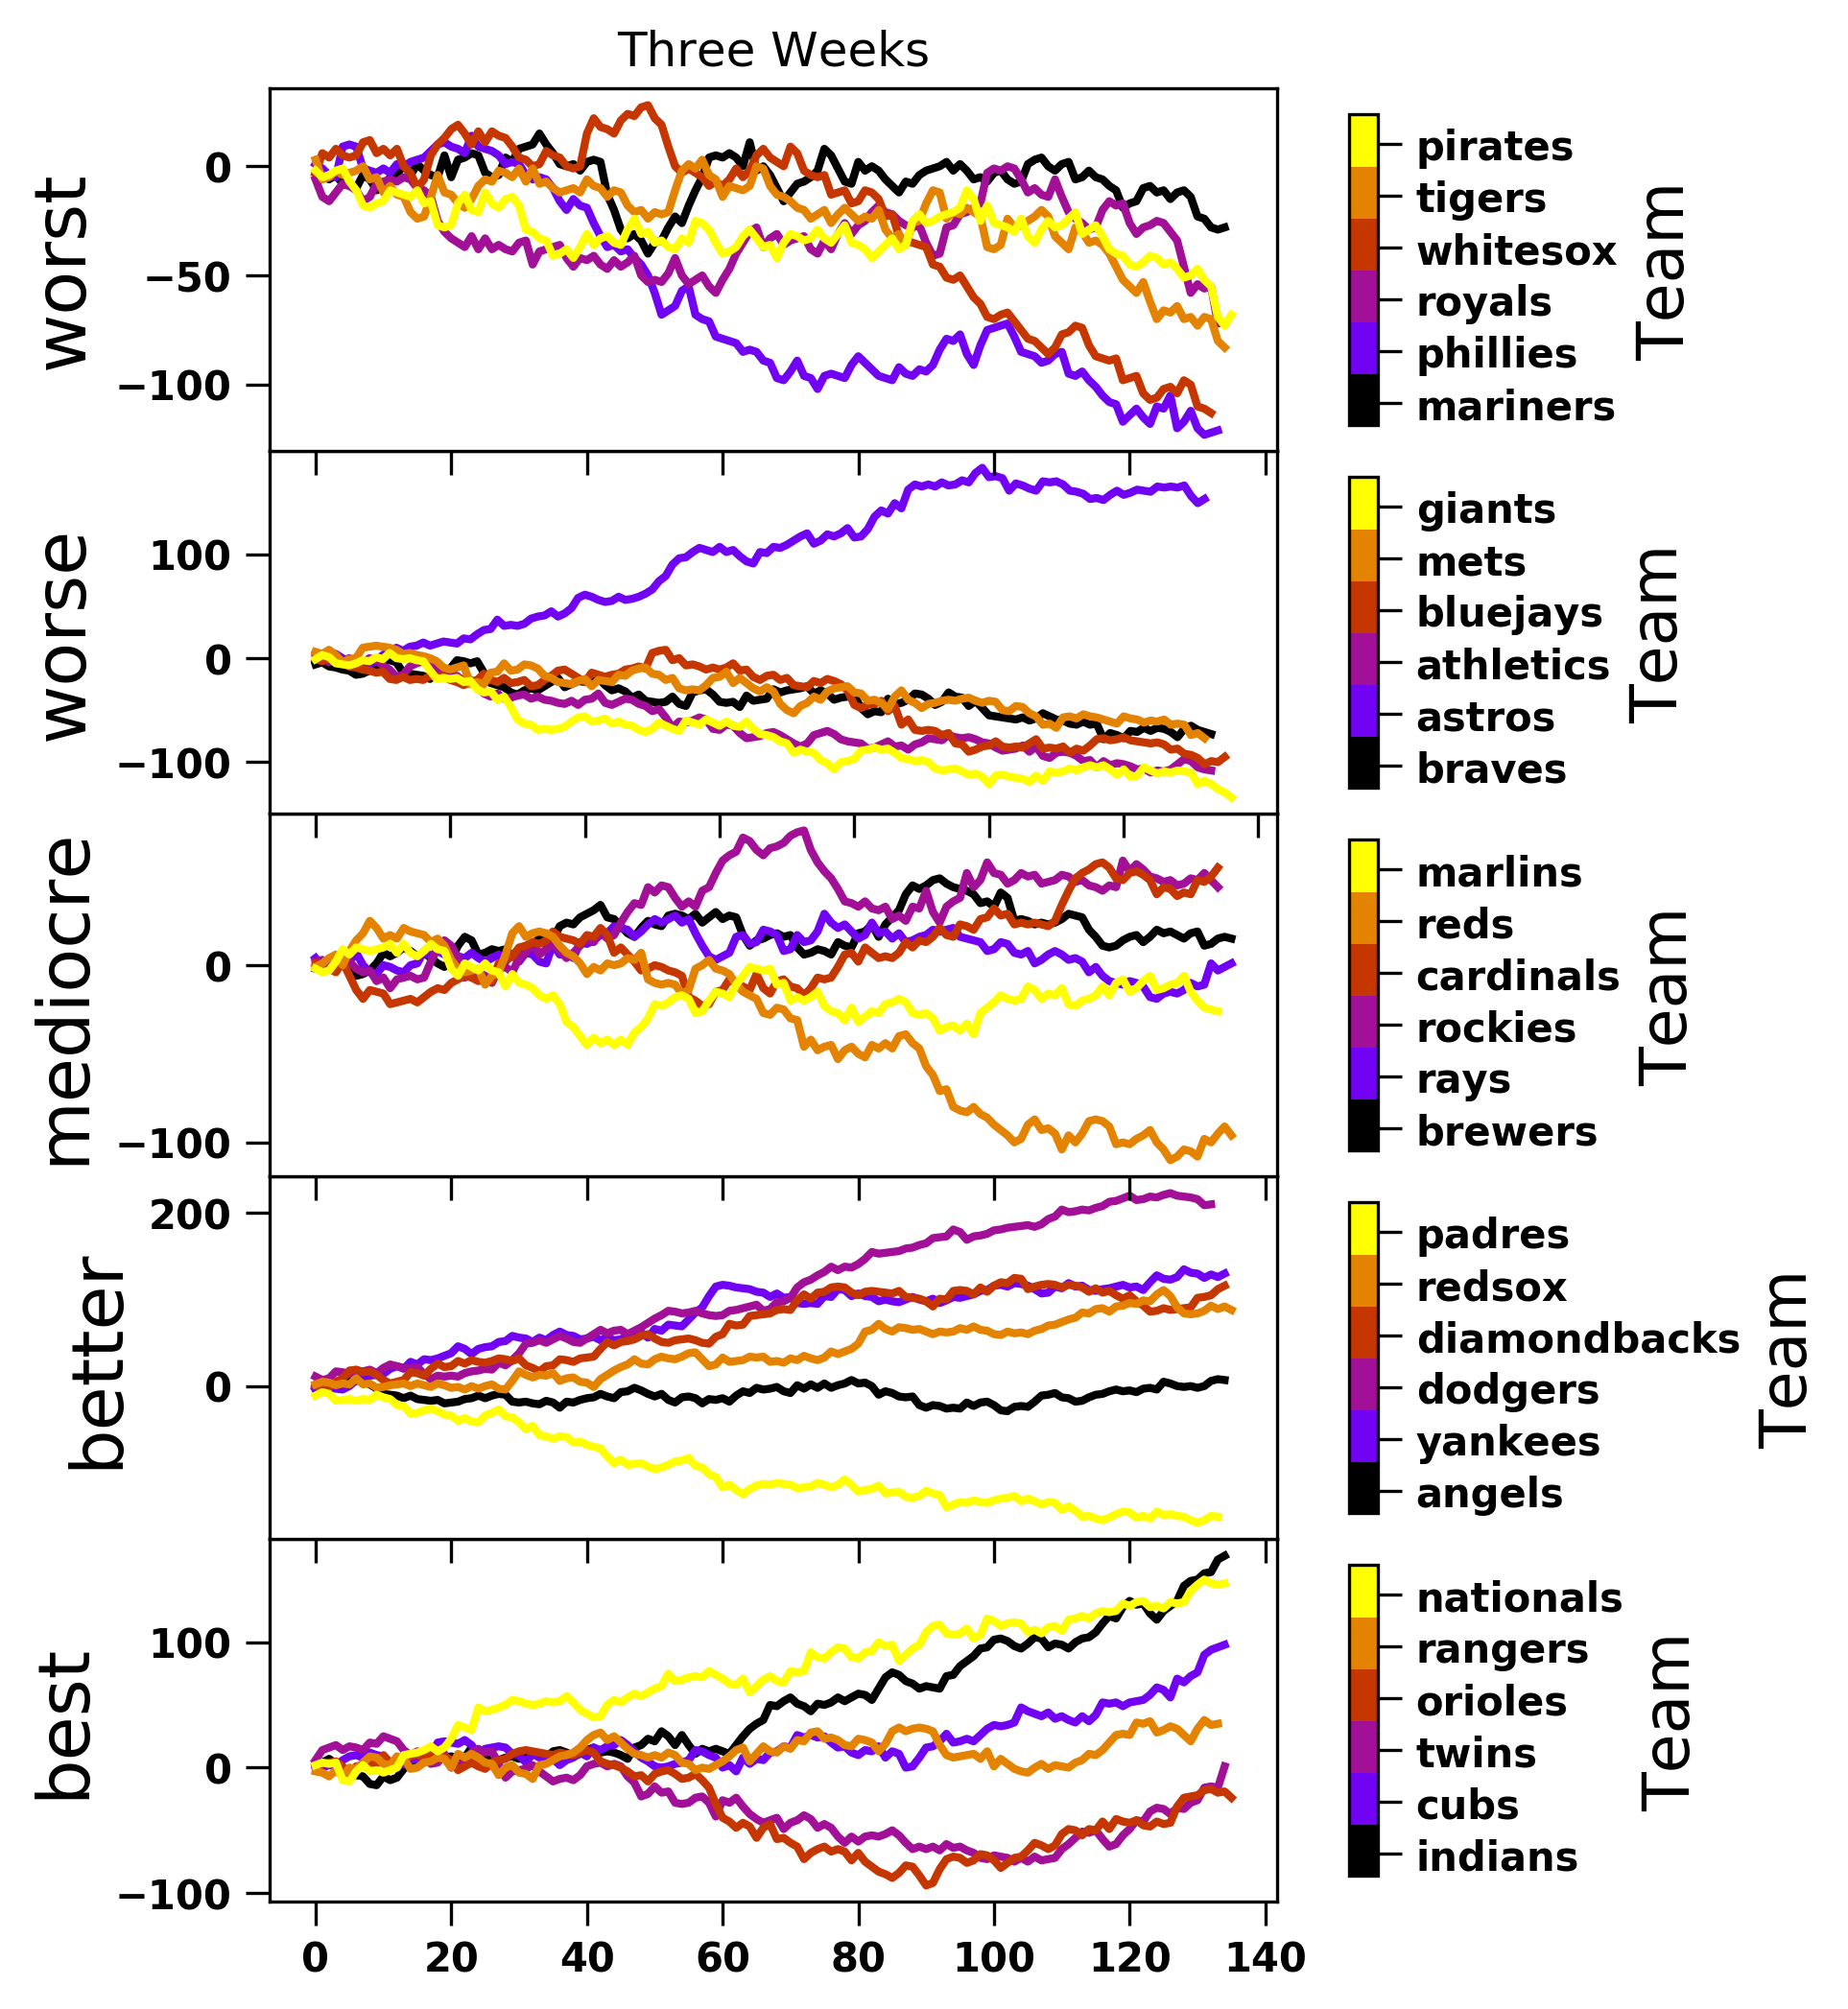

In [9]:
fig = plt.figure(figsize=(5,9))

ax1 = fig.add_axes([0.15,0.15,0.7,0.14]); ax11 = fig.add_axes([0.9,0.16,0.02,0.12])

ax2 = fig.add_axes([0.15,0.29,0.7,0.14]); ax21 = fig.add_axes([0.9,0.30,0.02,0.12])
ax3 = fig.add_axes([0.15,0.43,0.7,0.14]); ax31 = fig.add_axes([0.9,0.44,0.02,0.12])
ax4 = fig.add_axes([0.15,0.57,0.7,0.14]); ax41 = fig.add_axes([0.9,0.58,0.02,0.12])
ax5 = fig.add_axes([0.15,0.71,0.7,0.14]); ax51 = fig.add_axes([0.9,0.72,0.02,0.12])


ax_list = [ax1,ax2,ax3,ax4,ax5]
ax_list1 = [ax11,ax21,ax31,ax41,ax51]

standings = ['best','better','mediocre','worse','worst']

teamlist = []
for j in range(0,5):
    teamlist.append([sorted_x[::-1][i][0] for i in range(j*6,(j+1)*6)])


for indxteam,teams2 in enumerate(teamlist):
    for indx,inteam in enumerate(teams2):

        ax_list[indxteam].plot(np.cumsum(Schedule[inteam]['HomeRuns'].astype(float) - Schedule[inteam]['OppRuns'].astype(float)),color=cm.gnuplot(indx/float(len(teams2)-1.),1.))
    

    norm = mpl.colors.BoundaryNorm(boundaries=np.linspace(0,1.,len(teams2)+1.), ncolors=256)
    cb1 = mpl.colorbar.ColorbarBase(ax_list1[indxteam], cmap=cmap,norm=norm)
    cb1.set_label('Team',size=16)
    cb1.set_ticks(np.linspace(0.,1.,len(teams2)+1.) + 0.5/(len(teams2)+1.))
    cb1.set_ticklabels(teams2)
    
    if indxteam > 0:
        ax_list[indxteam].set_xticklabels(())

    ax_list[indxteam].set_ylabel(standings[indxteam],size=18)

    
_ = ax5.set_title('Three Weeks')